In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('data/iris.data', header=None)
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

In this notebook you'll be introduced to the main idea and workflow of *modeling* data. In this context, a *model* is an algorithm that takes some input `X` and produces some output `y`. Typically, `y` is some information about the data that we want to predict based on the observed `X`. 

For example, in our Iris dataset, we have *labels* for the species of all 150 flowers (e.g., a botanist looked at each flower and identified its species). Using this dataset, we can *train* a model that predicts the species of flower based on its measurements. Then, if we obtain the measurements of a new flower, we can use our model to predict its species (without showing a photo of the flower to a botanist for identification).  

To start, we can split our dataset up into `X` and `y`:

In [3]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df['class']

We will start with a relatively simple type of model called **logistic regression**. A brief review of logistic regression can be found here (todo). Don't worry about understanding the technical details right now, we'll first focus on the high-level process of modeling data.

# Logistic Regression

[Scikit-learn](https://scikit-learn.org/stable/index.html) is a Python library for training and evaluating machine learning models. In this section, we go over the fundamental steps of building a model in scikit-learn. First, we will import the specific model that we need (`LogisticRegression`).

In [4]:
from sklearn.linear_model import LogisticRegression

We then need to create an instance of the logistic regression model, which can be done by calling `LogisticRegression()`. If we want to specify any particular model settings, we would pass them to the function here (we'll look at this in detail later in this notebook).

In [5]:
lr = LogisticRegression()

Then, we **train** the model, attempting to teach it to predict `y` from `X`. To do this, we call the `fit` method on the model we created, giving it our `X` and `y`. 

In [6]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now that it has been trained, we can use the model to predict a flower's species given its measurements. For example, the model predicts that a flower with a sepal length, sepal width, petal length, and petal width of 5.0, 4.7, 1.3, and 0.2, respectively, is an Iris setosa flower:

In [7]:
X_new = [5.0,4.7,1.3,0.2] 
X_new = np.array(X_new).reshape(1, -1) # use numpy to put the new row in the correct format

In [8]:
lr.predict(X_new)

array(['Iris-setosa'], dtype=object)

Now that we have our model, it's important to **evaluate** it, or check the quality of its predictions. There are many different model evaluation strategies. For a simple example, we can give the model our data `X` and observe the predictions it makes. These predictions are denoted `ŷ`, pronounced "y hat." We can then compare these predictions to the true `y`.

In [9]:
y_hat = lr.predict(X)

For example, we can check how often the predicted species is equal to the true species (i.e., the *accuracy* of the model):

In [10]:
sum(y_hat==y)/len(y)

0.9733333333333334

Scikit-learn has a built-in method, `score`, to do the same thing (generate predictions from `X` and check accuracy against the true `y`):

In [11]:
lr.score(X, y)

0.9733333333333334

# Notes: Overfitting

However, in practice, we don't *evaluate* the model using the same data it was trained on. The reason for this is that we want to quantify how well the model will perform on new data it hasn't seen before. Otherwise, the model could end up "memorizing" the training data points.

This is related to the problem of **overfitting**. A common issue with machine learning models is that they can become too specific to the training data, or memorize the training data, and not be well-equipped to generalize to new data. To be more concrete, consider the following data:

In [12]:
import matplotlib.pyplot as plt

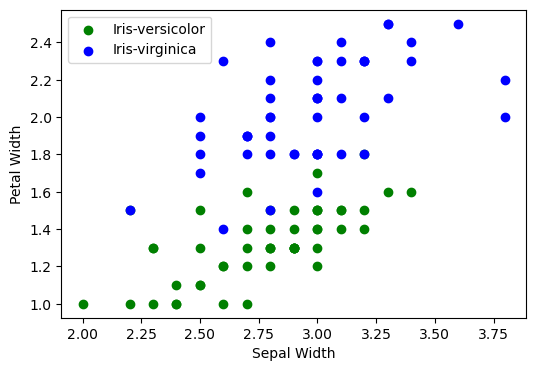

In [13]:
class_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
fig, ax = plt.subplots(figsize=(6,4))

for iris_class in ['Iris-versicolor','Iris-virginica']:
    class_data = df[df['class'] == iris_class]
    ax.scatter(class_data['sepal_width'], class_data['petal_width'],
               color=class_colors[iris_class], label=iris_class) 

ax.set_xlabel('Sepal Width'); ax.set_ylabel('Petal Width')
ax.legend() 
plt.show()

Given just the sepal and petal widths of a flower, if we wanted to make a simple "model" to predict whether it's a versicolor or virginica flower, we could, for instance, decide based on whether the point falls above or below some dividing line, for example:

![balance](https://www.markellekelly.com/assets/balance.png)

With this approach, a few flowers from both species would be labeled incorrectly, but the line seems like an appropriate summary of the pattern we see. We can imagine that if we added some new flowers to this graph, the line would mostly correctly classify them.

However, if we wanted to create a model with perfect accuracy on these points, we could draw a line like this:

![overfit](https://www.markellekelly.com/assets/overfit.png)

Using this line to divide the data, all the points in our dataset would be correctly classified. However, it seems unlikely that, if we observed 100 new flowers, that they would all be correctly classified by this line. Thus, this curvy line *overfits* the data. 

As we've shown here, achieving very high accuracy on the data you already have may not translate to optimal performance on new data. So how can we evaluate our model without waiting for new data to be collected?

# Model Evaluation: Train/test split

In general, we evaluate models using a **train/test split**. This means that, before we perform any modeling on the data, we randomly select some observations to *hold out*. In other words, we split up the dataset, using part of it to train the model while saving some (unseen to the model) data for model evaluation. Scikit-learn has a function [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split up the data for us:

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

By default, `train_test_split` randomly chooses 25% of the data to save for testing. This testing data is stored in `X_test` and `y_test`, while the subset we'll use for training is `X_train` and `y_train`. (Side note: although these points are randomly chosen, we set the `random_state` argument, which ensures that our results are the same every time). Of our 150 data points, we have 112 points to train the model and 38 that we'll save to test it:

In [16]:
len(y_train)

112

In [17]:
len(y_test)

38

Let's re-run our logistic regression using this train/test paradigm.

In [18]:
lr = LogisticRegression(solver='liblinear', random_state=0)

In [19]:
lr.fit(X_train, y_train) # fit, or train, the model on the training data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Our accuracy on the training dataset is relatively high at about 94.6%:

In [20]:
lr.score(X_train, y_train)

0.9464285714285714

However, our *test accuracy* is not as high at about 86.8%:

In [21]:
lr.score(X_test, y_test) # evaluate, or test, the model on the testing data

0.868421052631579

It seems like this logistic regression model is not generalizing to "new" flowers as well as it could be. Let's bring out the big guns!

# Neural Networks

**Neural networks** are the highest-performing, most-discussed machine learning models used today. The "AI"s you hear about on the news (e.g., [DALL-E](https://www.wired.com/story/dalle-ai-meme-machine/) or [ChatGPT](https://openai.com/chatgpt)), are (very big and complex) neural networks. We won't get into the technical details of how neural networks work right now, but check out (todo) for the main ideas.

We can build a simple neural network in scikit-learn by creating an `MLPClassifier`:

In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
mlp = MLPClassifier(max_iter=1000, random_state=0)

Using the same `fit()` method we used for the logistic regression, train the `mlp` on our training data:

In [25]:
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Now, compute the accuracy of the model on our testing data (using `score()`):

In [27]:
mlp.score(X_test, y_test)

0.9736842105263158

Nice! Based on our accuracy on the testing data, our neural network can correctly classify new data points with over 97% accuracy! 